# What is the effect of a candidate living place on voting behaviour?


## 1. Introduction

Every four year, local council elections are held in the Netherlands. After these elections, a new municipal council is established. After the elections, political parties form a new coalition to have a majority vote in the municipal council. This coalition mandates a new municipal board, the council of mayor and aldermen (in Dutch: college van burgemeester en wethouders). After this process, the municipal council still has controlling and legislative power to the council of mayor and aldermen.

For every election, political parties can form a list to participate. This list contains the name of the party, the number of the list and the candidates, their living place and their number on the list. The number of council members in the council, however, is limited by law Since 19.., this number is depending on the number of citizens in each municipality(see table...).. For councils with 19 or more seats to be divided, the algorithm by d’Hondt is used to divide the seats. This means that all the votes for one party are divided by real numbers and placed in order from high to low. The kth-highest values, where k is the number of seats in the municipal council, will receive a seat for that party. The persons on top of every list will be elected, unless a candidate receives a preferential vote (25% of total votes divided by seats).

\begin{equation*}
preferential  vote = 25\% * \frac{total  votes}{number  of  seats}
\end{equation*}

This paper examines the local elections in the municipality of Hulst, a small, rural municipality in the south-west of the Netherlands, during 2018. The main question that will be answered is what the influence is of the living place of the council-candidate on the total number of votes. This paper will do this by using a model created in Python, which can also be applicable to other elections. Some assumptions that has been made that might need modification for other applications, are listed in appendix A.


## 2. Descriptive statistics

### 2.1 Demography

In this section, demographics of the municipality will be discussed. Since we cannot assign characteristics to each voters, due to the secrecy of voting, it is impossible to assign these characteristics to an individual voter. It is highly assumable that these characteristics might influence the party or person one vote for. One could instead choose to assign average characteristics to each visitor of the voting bureau. For reasons that will become clear in section 2.3.1, this method is not used. Instead, an overview of characteristics of each town (in CBS-language: 'wijk') is given, as provided by the dutch statistic bureau. Besides from being informative, these statistics will be useful in other sections.

In [67]:
##wijken

#### 2.1.1. Inhabitants

In the follwing graph, the number of inhabitants in each town is shown. As we can see, Hulst is the largest city  with 10935 inhabitants, followed by Kloosterzande and Sint Jansteen with 3175 and 3325 inhabitants respectively. All numbers in this graph are rounded to 5.

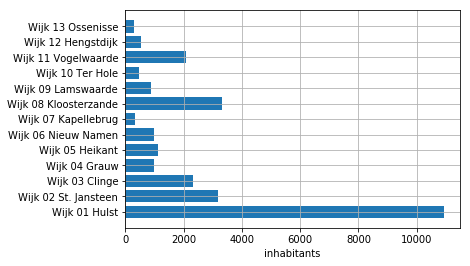

,a_inw
regio,
Wijk 01 Hulst,10935
Wijk 02 St. Jansteen,3175
Wijk 03 Clinge,2335
Wijk 04 Grauw,975
Wijk 05 Heikant,1110
Wijk 06 Nieuw Namen,995
Wijk 07 Kapellebrug,320
Wijk 08 Kloosterzande,3325
Wijk 09 Lamswaarde,885


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sta=pd.read_csv('cbs1.csv', delimiter=';', index_col=2)
inh=sta.iloc[:,[6]].values
nwijk=np.arange(len(inh))
plt.barh(nwijk, inh)
plt.yticks(nwijk, sta.index)
plt.grid()
plt.xlabel('inhabitants')
plt.show()
sta.iloc[:,[6]]

#### 2.1.2. Distribution by age

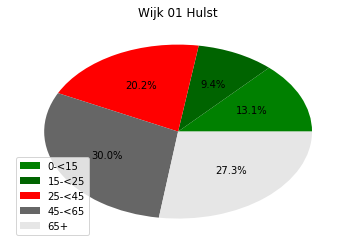

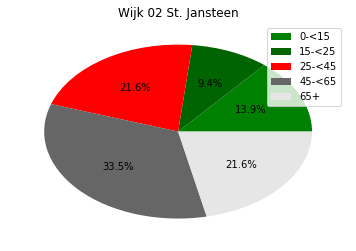

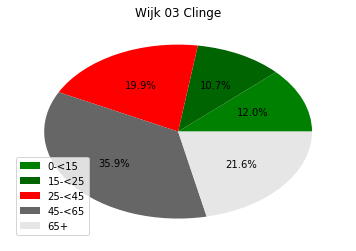

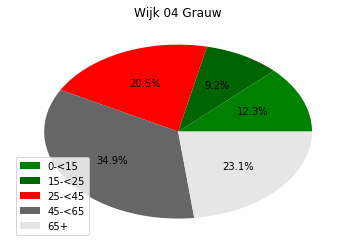

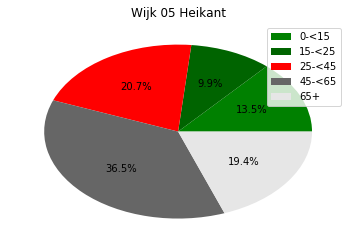

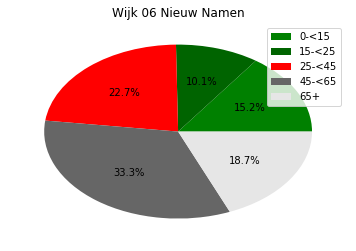

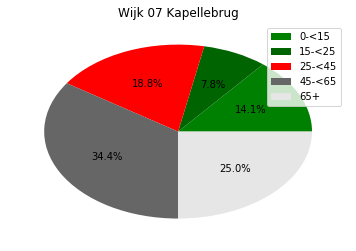

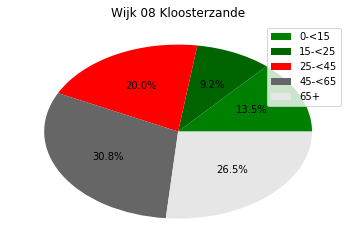

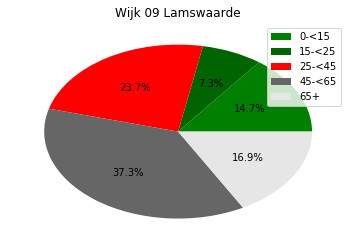

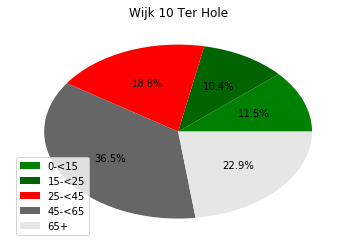

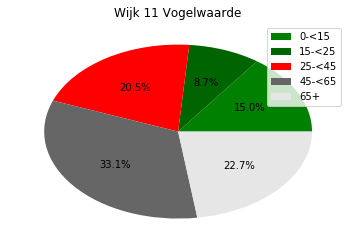

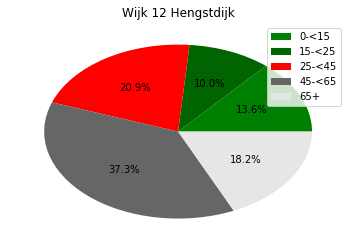

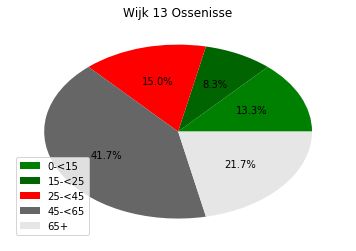

In [69]:
def p(i):
    return sta.iloc[i,9:14].values
titles = sta.index
labels = ['0-<15','15-<25','25-<45','45-<65','65+']
for i in range(0,13):
    plt.figure(i)
    plt.pie(p(i), colors=("g", '#006400','r','0.4','0.90'), autopct='%1.1f%%')
    plt.legend(labels)
    plt.title(titles[i])  
plt.show()

#### 2.1.3. Income and poverty

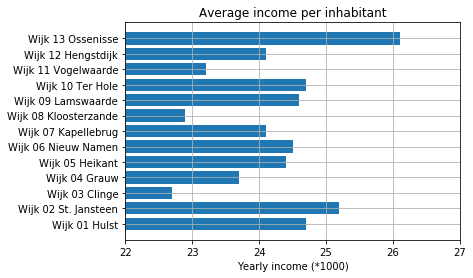

In [70]:
sta2015=pd.read_csv('cbs2015.csv', delimiter=';', index_col=2)
y=sta2015.iloc[:,[67]].values
plt.barh(nwijk, y)
plt.yticks(nwijk, sta.index)
plt.axis(xmin=22, xmax=27)
plt.title('Average income per inhabitant')
plt.xlabel('Yearly income (*1000)')
plt.grid()
plt.show()

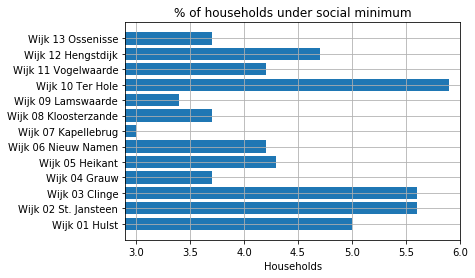

In [71]:
y=sta2015.iloc[:,[74]].values
plt.barh(nwijk, y)
plt.yticks(nwijk, sta2015.index)
plt.title('% of households under social minimum')
plt.xlabel('Households')
plt.axis(xmin=2.9, xmax=6)
plt.grid()
plt.show()

### 2.2 Candidates

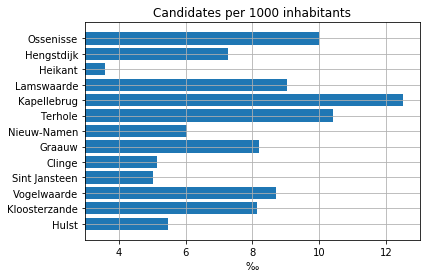

In [111]:
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
lp=uitslag['Woonplaats'].value_counts()
lp=pd.DataFrame(lp)
lp=lp.rename(columns={'Woonplaats':'livingplace'})
lp.loc["Kloosterzande"]=lp.loc["Kloosterzande"]+lp.loc["Walsoorden"]
lp=lp.drop('Walsoorden')
lp.loc['Lamswaarde']=lp.loc['Lamswaarde']+lp.loc['Kuitaart']
lp=lp.drop('Kuitaart')
lp=lp.drop(['Zaamslag', 'Vlissingen', 'Koewacht'])
inh= pd.DataFrame(inh)
villages=['Hulst', 'Sint Jansteen', 'Clinge', 'Graauw', 'Heikant', 'Nieuw-Namen','Kapellebrug', 'Kloosterzande', "Lamswaarde", "Terhole", 'Vogelwaarde', 'Hengstdijk', 'Ossenisse']
for i in range(0,13):
    inh=inh.rename(index={i:villages[i]})
lp=lp.merge(inh, left_index=True, right_index=True)
lp=lp.rename(columns={0:'inhabitants'})
lp['candidatesper1000']=lp.livingplace/lp.inhabitants*1000
cpt=lp.candidatesper1000.values
ncpt=np.arange(len(cpt))
plt.barh(ncpt, cpt)
plt.yticks(ncpt, lp.index)
plt.title('Candidates per 1000 inhabitants')
plt.xlabel('‰')
plt.axis(xmin=3, xmax=13)
plt.grid()
plt.show()

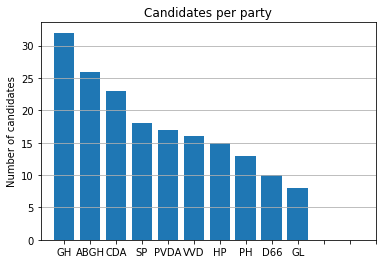

,Party
GH,32
ABGH,26
CDA,23
SP,18
PVDA,17
VVD,16
HP,15
PH,13
D66,10
GL,8


In [127]:
lp=uitslag['Partij'].value_counts()
lp=pd.DataFrame(lp)
lp=lp.rename(columns={'Partij':'Party'})
lpa=lp.Party.values
nlpa=np.arange(len(lp))
plt.bar(nlpa, lpa)
plt.xticks(ncpt, lp.index)
plt.title('Candidates per party')
plt.ylabel('Number of candidates')
plt.grid(axis='y')
plt.show()
lp

### 2.3 Elections

In this section, the outcome of the 2018 elections will be discussed. As already pointed out in the introduction section, seats for the council are granted by the highest quotients of every party, the so-called 'd'Hondt-algoritm.

During the 2018 election, there were 15 different voting bureaus in the municipallity of Hulst. 4 of them (ST1, ST2, ST3 and ST4) where located in the biggest town, Hulst. The others were located in the smaller villages Clinge, Nieuw-Namen, Graauw, Sint Jansteen, Heikant, Kloosterzande, Lamswaarde, Terhole, Vogelwaarde, Ossenisse and Hengstdijk.

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np
coo=pd.read_csv('C:\Users\Jelle Roelants\Documents\Coordinaten.csv', delimiter=';', index_col=0)
m = Basemap(projection='mill', llcrnrlat=51.213918, urcrnrlat=51.426835,llcrnrlon=3.927361, urcrnrlon=4.247356, resolution='h')
lat = coo.iloc[:,[0]]
lon = coo.iloc[:,[1]]
lat=lat.values
lon=lon.values
m.plot(x=lon, y=lat, latlon=True, linewidth=0, marker='o', label=labels)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents()
m.drawmapboundary()
plt.title('Stembureaus')
plt.show()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-33-75865223d5b4>, line 5)

#### 2.3.1 Electoral turnout


A few weeks before the election starts, every citizen who is allowed to vote will receive a letter with a call to vote. This letter, in combination with showing a valid pasport, allows the citizen to vote. Also, this letter points out the voting station which is closest to the address of the citizen. However, one can vote in every voting bureau in their municipal he or she wishes. The number of letters sent by the government is the number of total calls. Together with the actual casted votes, the percentage of electoral turnout can be computed as follows:

\begin{equation*}
Electoral-turnout = \frac{votes}{calls}
\end{equation*}

The electoral turnout will first be examined. The electoral turnout of every voting bureau is an estimation, since it is not mandatory to vote at the reccomended bureau.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
calls=pd.read_csv('Calls.csv', delimiter=';', index_col=0)
calls.insert(2,"Electoral turnout in %", calls.Votes/calls.Calls*100)
calls

,Votes,Calls,Electoral turnout in %
Voting bureau,,,
ST1,1862,2523,73.801031
ST2,937,1395,67.168459
ST3,1414,2314,61.106309
ST4,998,2751,36.277717
ST5,907,1962,46.228338
ST6,332,808,41.089109
ST7,495,783,63.218391
ST8,1463,2842,51.477833
ST9,575,1080,53.240741


#### 2.3.2 Total

First, the new municipality council is calculated based on the d'Hondt algoritm. This is equal to the total outcome of votes in the municipality of Hulst. Then, an equal calculation is done for every town or village in the municipality in Hulst. The four election bureaus called ST1, ST2, ST3 and ST4 in the city of Hulst are taken together in these calculations, because they are very close to each other. The calculations give a good representation of the voting behaviour in that village, although such councils are still hypothetical.

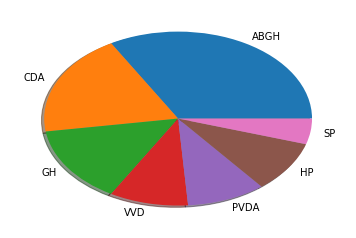

ABGH    7
CDA     4
GH      3
VVD     2
PVDA    2
HP      2
SP      1
Name: Partij, dtype: int64


In [11]:
#Importing the csv file, see appendix B for lay-out sample.
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
uitslag['Hulst']=uitslag['ST1']+uitslag['ST2']+uitslag['ST3']+uitslag["ST4"]
#Adding up all the votes for each Party
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.Totaal[uitslag.ABGH==1].sum(),uitslag.Totaal[uitslag.CDA==1].sum(),uitslag.Totaal[uitslag.PH==1].sum(),uitslag.Totaal[uitslag.GH==1].sum(),uitslag.Totaal[uitslag.PVDA==1].sum(),uitslag.Totaal[uitslag.VVD==1].sum(),uitslag.Totaal[uitslag.SP==1].sum(),uitslag.Totaal[uitslag.HP==1].sum(),uitslag.Totaal[uitslag.GL==1].sum(),uitslag.Totaal[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
#Defining the number of seats
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    #Add columns with divisions by any real number as long as 
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    #Make one dataframe with column party and respective divisions
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
#Defining the seats for every party
zetels= quotient.nlargest(seats,'quotient', keep='first')
#Defining the number of seats per party
zetelverdeling=zetels['Partij'].value_counts()
#Create a pie chart
labels= zetelverdeling.index
ax=plt.pie(zetelverdeling, labels=labels, shadow=True)
#Printing the election outcome
plt.show()
print(zetelverdeling)

#### 2.3.3. Hulst

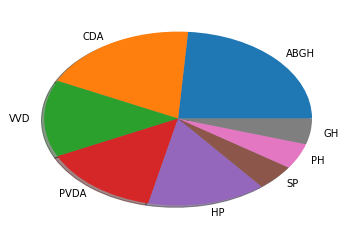

ABGH    5
CDA     4
VVD     3
PVDA    3
HP      3
SP      1
PH      1
GH      1
Name: Partij, dtype: int64


In [12]:
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
uitslag['Hulst']=uitslag['ST1']+uitslag['ST2']+uitslag['ST3']+uitslag["ST4"]
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.Hulst[uitslag.ABGH==1].sum(),uitslag.Hulst[uitslag.CDA==1].sum(),uitslag.Hulst[uitslag.PH==1].sum(),uitslag.Hulst[uitslag.GH==1].sum(),uitslag.Hulst[uitslag.PVDA==1].sum(),uitslag.Hulst[uitslag.VVD==1].sum(),uitslag.Hulst[uitslag.SP==1].sum(),uitslag.Hulst[uitslag.HP==1].sum(),uitslag.Hulst[uitslag.GL==1].sum(),uitslag.Hulst[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.4 Clinge

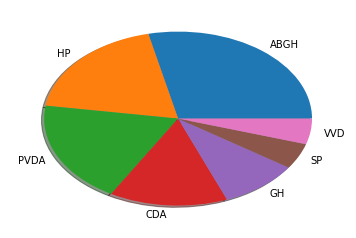

ABGH    6
HP      4
PVDA    4
CDA     3
GH      2
SP      1
VVD     1
Name: Partij, dtype: int64


In [37]:
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
uitslag['Hulst']=uitslag['ST1']+uitslag['ST2']+uitslag['ST3']+uitslag["ST4"]
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST5[uitslag.ABGH==1].sum(),uitslag.ST5[uitslag.CDA==1].sum(),uitslag.ST5[uitslag.PH==1].sum(),uitslag.ST5[uitslag.GH==1].sum(),uitslag.ST5[uitslag.PVDA==1].sum(),uitslag.ST5[uitslag.VVD==1].sum(),uitslag.ST5[uitslag.SP==1].sum(),uitslag.ST5[uitslag.HP==1].sum(),uitslag.ST5[uitslag.GL==1].sum(),uitslag.ST5[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.5. Nieuw-Namen


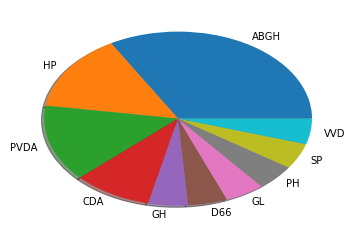

ABGH    7
HP      3
PVDA    3
CDA     2
GH      1
D66     1
GL      1
PH      1
SP      1
VVD     1
Name: Partij, dtype: int64


In [38]:
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
uitslag['Hulst']=uitslag['ST1']+uitslag['ST2']+uitslag['ST3']+uitslag["ST4"]
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST6[uitslag.ABGH==1].sum(),uitslag.ST6[uitslag.CDA==1].sum(),uitslag.ST6[uitslag.PH==1].sum(),uitslag.ST6[uitslag.GH==1].sum(),uitslag.ST6[uitslag.PVDA==1].sum(),uitslag.ST6[uitslag.VVD==1].sum(),uitslag.ST6[uitslag.SP==1].sum(),uitslag.ST6[uitslag.HP==1].sum(),uitslag.ST6[uitslag.GL==1].sum(),uitslag.ST6[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.6. Graauw

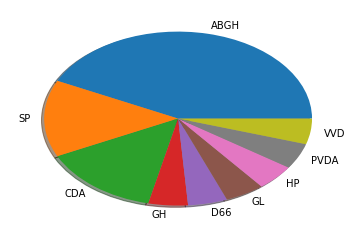

ABGH    9
SP      3
CDA     3
GH      1
D66     1
GL      1
HP      1
PVDA    1
VVD     1
Name: Partij, dtype: int64


In [39]:
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
uitslag['Hulst']=uitslag['ST1']+uitslag['ST2']+uitslag['ST3']+uitslag["ST4"]
uitslag=uitslag.rename(columns={'ST 7':'ST7'})
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST7[uitslag.ABGH==1].sum(),uitslag.ST7[uitslag.CDA==1].sum(),uitslag.ST7[uitslag.PH==1].sum(),uitslag.ST7[uitslag.GH==1].sum(),uitslag.ST7[uitslag.PVDA==1].sum(),uitslag.ST7[uitslag.VVD==1].sum(),uitslag.ST7[uitslag.SP==1].sum(),uitslag.ST7[uitslag.HP==1].sum(),uitslag.ST7[uitslag.GL==1].sum(),uitslag.ST7[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.7. Sint Jansteen

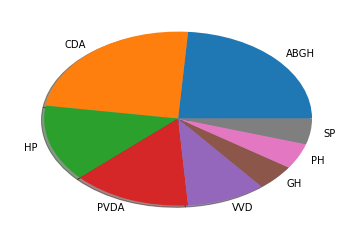

ABGH    5
CDA     5
HP      3
PVDA    3
VVD     2
GH      1
PH      1
SP      1
Name: Partij, dtype: int64


In [40]:
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
uitslag['Hulst']=uitslag['ST1']+uitslag['ST2']+uitslag['ST3']+uitslag["ST4"]
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST8[uitslag.ABGH==1].sum(),uitslag.ST8[uitslag.CDA==1].sum(),uitslag.ST8[uitslag.PH==1].sum(),uitslag.ST8[uitslag.GH==1].sum(),uitslag.ST8[uitslag.PVDA==1].sum(),uitslag.ST8[uitslag.VVD==1].sum(),uitslag.ST8[uitslag.SP==1].sum(),uitslag.ST8[uitslag.HP==1].sum(),uitslag.ST8[uitslag.GL==1].sum(),uitslag.ST8[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.8. Heikant

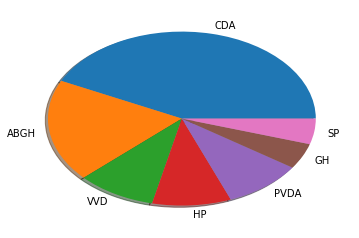

CDA     9
ABGH    4
VVD     2
HP      2
PVDA    2
GH      1
SP      1
Name: Partij, dtype: int64


In [41]:
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
uitslag['Hulst']=uitslag['ST1']+uitslag['ST2']+uitslag['ST3']+uitslag["ST4"]
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST9[uitslag.ABGH==1].sum(),uitslag.ST9[uitslag.CDA==1].sum(),uitslag.ST9[uitslag.PH==1].sum(),uitslag.ST9[uitslag.GH==1].sum(),uitslag.ST9[uitslag.PVDA==1].sum(),uitslag.ST9[uitslag.VVD==1].sum(),uitslag.ST9[uitslag.SP==1].sum(),uitslag.ST9[uitslag.HP==1].sum(),uitslag.ST9[uitslag.GL==1].sum(),uitslag.ST9[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.9. Kloosterzande

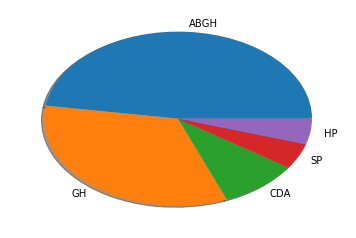

ABGH    10
GH       7
CDA      2
SP       1
HP       1
Name: Partij, dtype: int64


In [42]:
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
uitslag['Hulst']=uitslag['ST1']+uitslag['ST2']+uitslag['ST3']+uitslag["ST4"]
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST10[uitslag.ABGH==1].sum(),uitslag.ST10[uitslag.CDA==1].sum(),uitslag.ST10[uitslag.PH==1].sum(),uitslag.ST10[uitslag.GH==1].sum(),uitslag.ST10[uitslag.PVDA==1].sum(),uitslag.ST10[uitslag.VVD==1].sum(),uitslag.ST10[uitslag.SP==1].sum(),uitslag.ST10[uitslag.HP==1].sum(),uitslag.ST10[uitslag.GL==1].sum(),uitslag.ST10[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.10. Lamswaarde

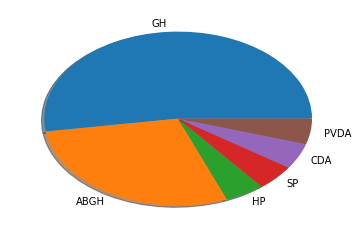

GH      11
ABGH     6
HP       1
SP       1
CDA      1
PVDA     1
Name: Partij, dtype: int64


In [66]:
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
uitslag['Hulst']=uitslag['ST1']+uitslag['ST2']+uitslag['ST3']+uitslag["ST4"]
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST11[uitslag.ABGH==1].sum(),uitslag.ST11[uitslag.CDA==1].sum(),uitslag.ST11[uitslag.PH==1].sum(),uitslag.ST11[uitslag.GH==1].sum(),uitslag.ST11[uitslag.PVDA==1].sum(),uitslag.ST11[uitslag.VVD==1].sum(),uitslag.ST11[uitslag.SP==1].sum(),uitslag.ST11[uitslag.HP==1].sum(),uitslag.ST11[uitslag.GL==1].sum(),uitslag.ST11[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.11. Terhole

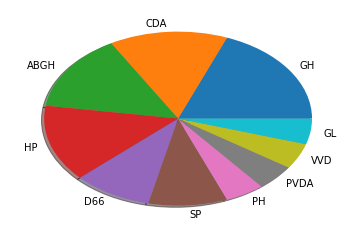

GH      4
CDA     3
ABGH    3
HP      3
D66     2
SP      2
PH      1
PVDA    1
VVD     1
GL      1
Name: Partij, dtype: int64


In [67]:
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
uitslag['Hulst']=uitslag['ST1']+uitslag['ST2']+uitslag['ST3']+uitslag["ST4"]
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST12[uitslag.ABGH==1].sum(),uitslag.ST12[uitslag.CDA==1].sum(),uitslag.ST12[uitslag.PH==1].sum(),uitslag.ST12[uitslag.GH==1].sum(),uitslag.ST12[uitslag.PVDA==1].sum(),uitslag.ST12[uitslag.VVD==1].sum(),uitslag.ST12[uitslag.SP==1].sum(),uitslag.ST12[uitslag.HP==1].sum(),uitslag.ST12[uitslag.GL==1].sum(),uitslag.ST12[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.12. Vogelwaarde

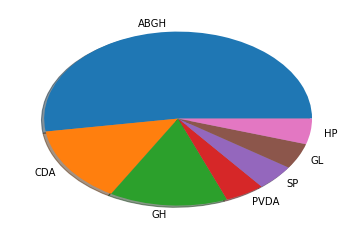

ABGH    11
CDA      3
GH       3
PVDA     1
SP       1
GL       1
HP       1
Name: Partij, dtype: int64


In [68]:
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
uitslag['Hulst']=uitslag['ST1']+uitslag['ST2']+uitslag['ST3']+uitslag["ST4"]
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST13[uitslag.ABGH==1].sum(),uitslag.ST13[uitslag.CDA==1].sum(),uitslag.ST13[uitslag.PH==1].sum(),uitslag.ST13[uitslag.GH==1].sum(),uitslag.ST13[uitslag.PVDA==1].sum(),uitslag.ST13[uitslag.VVD==1].sum(),uitslag.ST13[uitslag.SP==1].sum(),uitslag.ST13[uitslag.HP==1].sum(),uitslag.ST13[uitslag.GL==1].sum(),uitslag.ST13[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.13. Ossenisse

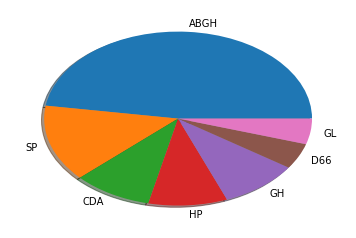

ABGH    10
SP       3
CDA      2
HP       2
GH       2
D66      1
GL       1
Name: Partij, dtype: int64


In [69]:
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
uitslag['Hulst']=uitslag['ST1']+uitslag['ST2']+uitslag['ST3']+uitslag["ST4"]
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST14[uitslag.ABGH==1].sum(),uitslag.ST14[uitslag.CDA==1].sum(),uitslag.ST14[uitslag.PH==1].sum(),uitslag.ST14[uitslag.GH==1].sum(),uitslag.ST14[uitslag.PVDA==1].sum(),uitslag.ST14[uitslag.VVD==1].sum(),uitslag.ST14[uitslag.SP==1].sum(),uitslag.ST14[uitslag.HP==1].sum(),uitslag.ST14[uitslag.GL==1].sum(),uitslag.ST14[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

#### 2.3.14. Hengstdijk

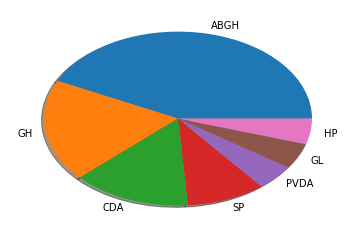

ABGH    9
GH      4
CDA     3
SP      2
PVDA    1
GL      1
HP      1
Name: Partij, dtype: int64


In [70]:
uitslag=pd.read_csv('pandas.csv', delimiter=';', index_col = 0)
uitslag['Hulst']=uitslag['ST1']+uitslag['ST2']+uitslag['ST3']+uitslag["ST4"]
uitslagpartij= {'Partij':['ABGH', 'CDA', 'PH', 'GH', 'PVDA', 'VVD', 'SP','HP', 'GL', 'D66'], 'x':[uitslag.ST15[uitslag.ABGH==1].sum(),uitslag.ST15[uitslag.CDA==1].sum(),uitslag.ST15[uitslag.PH==1].sum(),uitslag.ST15[uitslag.GH==1].sum(),uitslag.ST15[uitslag.PVDA==1].sum(),uitslag.ST15[uitslag.VVD==1].sum(),uitslag.ST15[uitslag.SP==1].sum(),uitslag.ST15[uitslag.HP==1].sum(),uitslag.ST15[uitslag.GL==1].sum(),uitslag.ST15[uitslag.D66==1].sum()]}
up=pd.DataFrame(data=uitslagpartij)
quo = {'Partij':[], 'quotient':[]}
quotient=pd.DataFrame()
seats=21
i=1
while i<seats:
    up.insert(i,'quotient',up.x/i,allow_duplicates=True)
    def a(i):
        return pd.DataFrame(up.iloc[:,[0,i]])
    quotient=quotient.append(a(i),ignore_index=True)
    i+=1
zetels= quotient.nlargest(seats,'quotient', keep='first')
zetelverdeling=zetels['Partij'].value_counts()
labels= zetelverdeling.index
ay=plt.pie(zetelverdeling, labels=labels, shadow=True)
plt.show()
print(zetelverdeling)

## 3. Model

votes for candidate = a + b x living place dummy + c x political party + e

## 4. Results

## 5. Discussion

## 6. Conclusion

## Appendix A

## Appendix B
